In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving fish.csv to fish (3).csv


In [ ]:
data=pd.read_csv('fish.csv', header = None)
data.head()

,0,1,2,3,4,5,6
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [ ]:
col_names=["Type_of_Fish","Width1","Width2","Length1","Length2","Length3","Height"]

In [ ]:
data.columns=col_names

In [ ]:
data.head(5)

,Type_of_Fish,Width1,Width2,Length1,Length2,Length3,Height
0,Bream,242.0,23.2,25.4,30.0,38.4,13.4
1,Bream,290.0,24.0,26.3,31.2,40.0,13.8
2,Bream,340.0,23.9,26.5,31.1,39.8,15.1
3,Bream,363.0,26.3,29.0,33.5,38.0,13.3
4,Bream,430.0,26.5,29.0,34.0,36.6,15.1


In [ ]:
data.isna().sum()

Type_of_Fish    0
Width1          0
Width2          0
Length1         0
Length2         0
Length3         0
Height          0
dtype: int64

In [ ]:
data.columns

Index(['Type_of_Fish', 'Width1', 'Width2', 'Length1', 'Length2', 'Length3',
       'Height'],
      dtype='object')

In [ ]:
data.describe()

,Width1,Width2,Length1,Length2,Length3,Height
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,431.758824,27.338824,29.557647,33.120000,28.076471,12.865882
std,380.933962,11.289450,12.185045,13.197292,10.351543,2.117476
min,0.000000,9.300000,9.800000,10.800000,14.500000,8.700000
25%,120.000000,19.400000,21.000000,23.700000,16.900000,11.000000
50%,390.000000,28.400000,30.700000,35.000000,27.100000,13.700000
75%,650.000000,32.700000,36.000000,40.600000,39.200000,14.700000
max,1650.000000,59.000000,63.400000,68.000000,44.500000,16.100000


<Axes: ylabel='Count'>

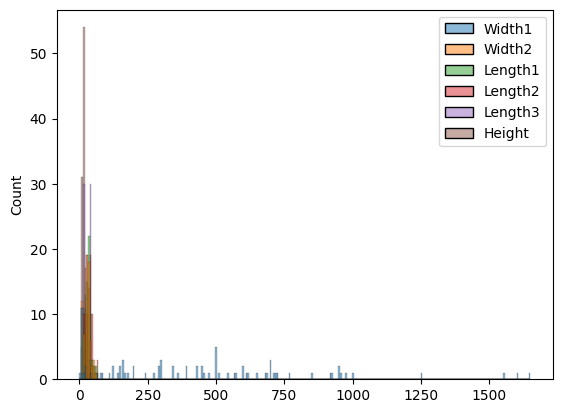

In [ ]:
sns.histplot(data)

<Axes: xlabel='Width1', ylabel='Count'>

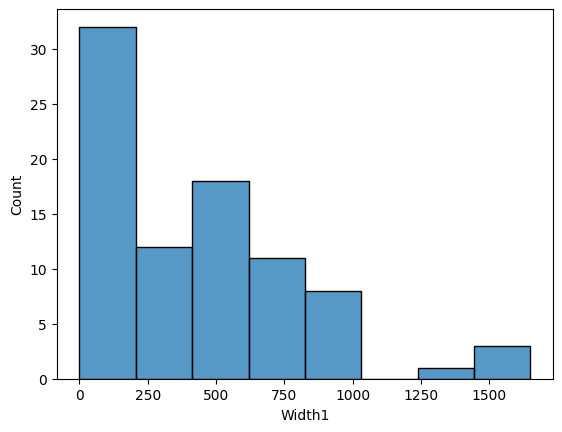

In [ ]:
sns.histplot(data['Width1'])

In [ ]:
data['Type_of_Fish'].value_counts()

Type_of_Fish
Bream    34
Roach    20
Pike     17
Smelt    14
Name: count, dtype: int64

In [ ]:
#Encoding
Type_of_fish_mapping={'Bream':0,'Roach':1,'Pike':2,'Smelt':3}

data['Type_of_Fish']=data['Type_of_Fish'].map(Type_of_fish_mapping)

In [ ]:
data.head()

,Type_of_Fish,Width1,Width2,Length1,Length2,Length3,Height
0,0,242.0,23.2,25.4,30.0,38.4,13.4
1,0,290.0,24.0,26.3,31.2,40.0,13.8
2,0,340.0,23.9,26.5,31.1,39.8,15.1
3,0,363.0,26.3,29.0,33.5,38.0,13.3
4,0,430.0,26.5,29.0,34.0,36.6,15.1


Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [ ]:
# to keep it in the DataFrame format after scaling

data[['Width1', 'Width2', 'Length1', 'Length2', 'Length3','Height']]=ss.fit_transform(data[['Width1', 'Width2', 'Length1', 'Length2', 'Length3',
       'Height']])
data.head()

,Type_of_Fish,Width1,Width2,Length1,Length2,Length3,Height
0,0,-0.501097,-0.368786,-0.343234,-0.237815,1.003212,0.253740
1,0,-0.374343,-0.297502,-0.268935,-0.146348,1.158696,0.443765
2,0,-0.242308,-0.306413,-0.252424,-0.153970,1.139261,1.061347
3,0,-0.181572,-0.092563,-0.046036,0.028965,0.964342,0.206233
4,0,-0.004645,-0.074743,-0.046036,0.067076,0.828293,1.061347


In [ ]:
#Defining X

x=data[['Width1', 'Width2', 'Length1', 'Length2', 'Length3',
       'Height']]

x.head()

,Width1,Width2,Length1,Length2,Length3,Height
0,-0.501097,-0.368786,-0.343234,-0.237815,1.003212,0.253740
1,-0.374343,-0.297502,-0.268935,-0.146348,1.158696,0.443765
2,-0.242308,-0.306413,-0.252424,-0.153970,1.139261,1.061347
3,-0.181572,-0.092563,-0.046036,0.028965,0.964342,0.206233
4,-0.004645,-0.074743,-0.046036,0.067076,0.828293,1.061347


Applying Kmeans

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init = 'k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)


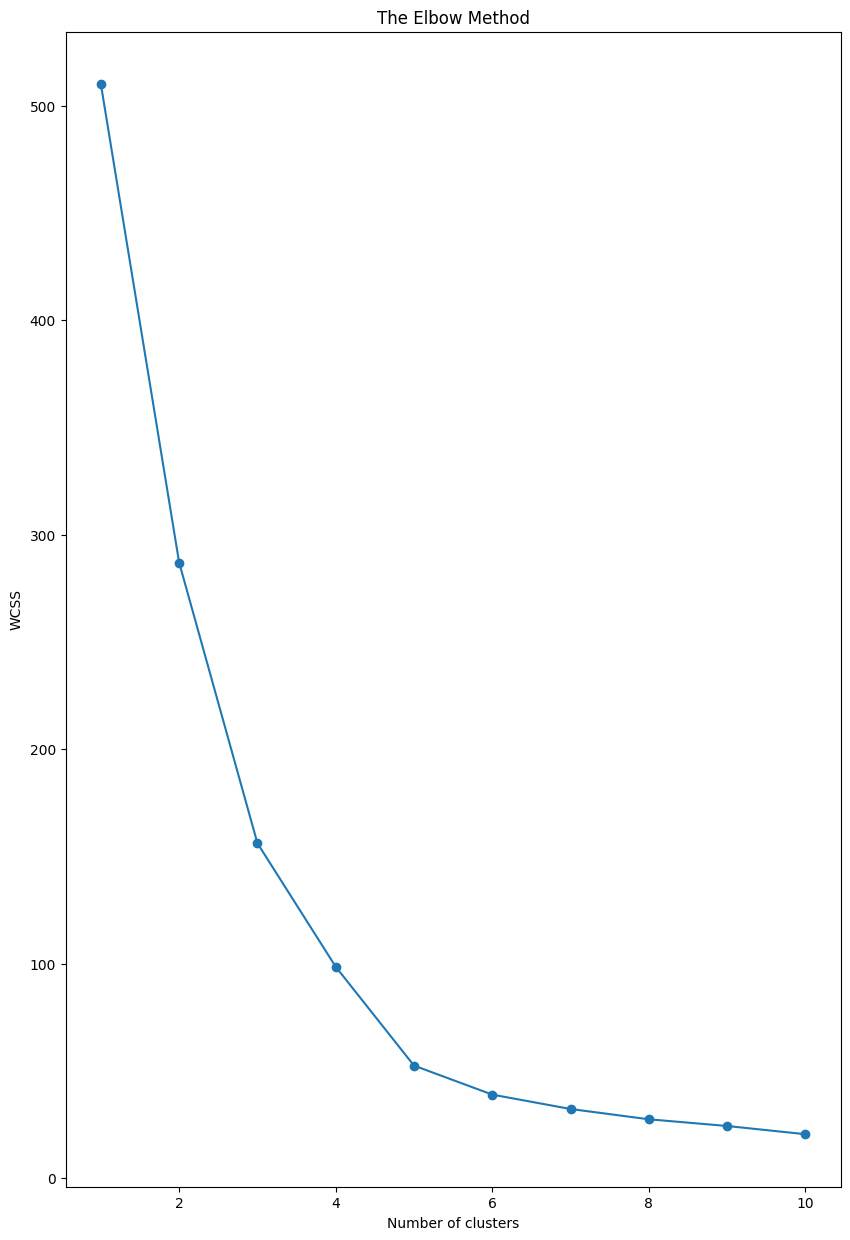

In [ ]:
# plotting the elbow method

plt.figure(figsize=(10,15))
plt.plot(range(1,11),wcss,marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# fitting the data

kmeans=KMeans(n_clusters=5,init='k-means++')
kmeans.fit(data[['Width1', 'Width2', 'Length1', 'Length2', 'Length3','Height']])

KMeans(n_clusters=5)

In [ ]:
# adding clusters to data

data['Clusters']=kmeans.labels_
data.head()

,Type_of_Fish,Width1,Width2,Length1,Length2,Length3,Height,Clusters
0,0,-0.501097,-0.368786,-0.343234,-0.237815,1.003212,0.253740,1
1,0,-0.374343,-0.297502,-0.268935,-0.146348,1.158696,0.443765,0
2,0,-0.242308,-0.306413,-0.252424,-0.153970,1.139261,1.061347,0
3,0,-0.181572,-0.092563,-0.046036,0.028965,0.964342,0.206233,0
4,0,-0.004645,-0.074743,-0.046036,0.067076,0.828293,1.061347,0


In [ ]:
data['Clusters'].unique()

array([1, 0, 2, 4, 3], dtype=int32)

In [ ]:
data.Clusters.value_counts()

Clusters
0    34
1    21
2    13
4    12
3     5
Name: count, dtype: int64

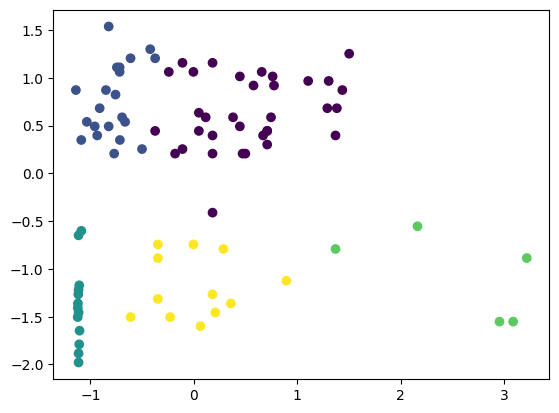

In [ ]:
#visualizing the clusters

plt.scatter(x=data['Width1'],
            y=data['Height'],c=data['Clusters'])

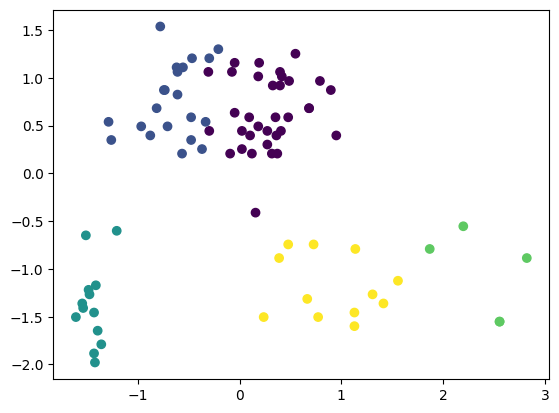

In [ ]:
#visualizing the clusters

plt.scatter(x=data['Width2'],
            y=data['Height'],c=data['Clusters'])

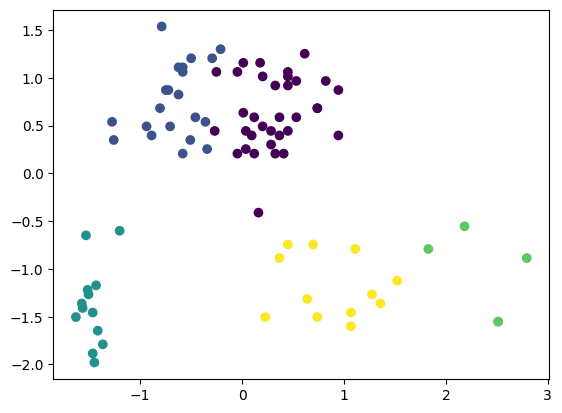

In [ ]:
#visualizing the clusters

plt.scatter(x=data['Length1'],
            y=data['Height'],c=data['Clusters'])

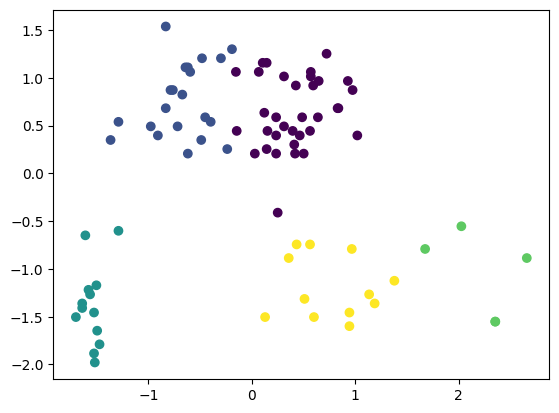

In [ ]:
#visualizing the clusters

plt.scatter(x=data['Length2'],
            y=data['Height'],c=data['Clusters'])

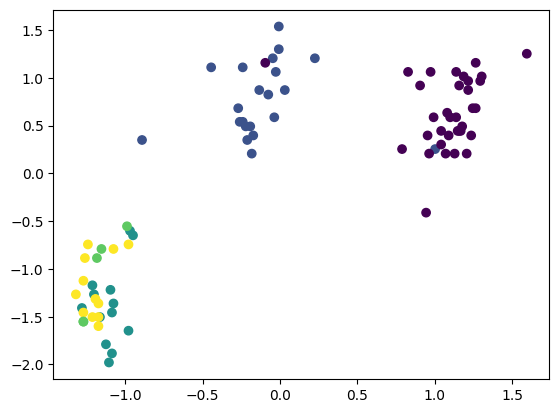

In [ ]:
#visualizing the clusters

plt.scatter(x=data['Length3'],
            y=data['Height'],c=data['Clusters'])

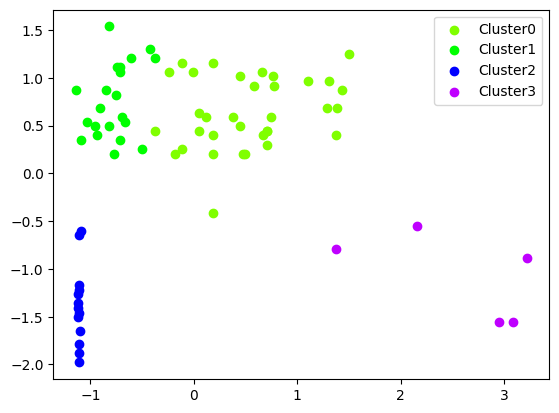

In [ ]:
c =['#80ff00','#00ff00','#0000ff','#bf00ff']
for i in range(4):
  x=data[['Width1','Height']]
  clusterdata =x[kmeans.labels_==i]
  plt.scatter(clusterdata['Width1'],clusterdata['Height'],c=c[i],label=f'Cluster{i}' )
plt.legend()
plt.show()

In [ ]:
#fuction to predict data

def predict_cluster(features,scaler,model):
  #transform the new data to the scaled values
  new_data_sc=scaler.transform(features)
  #predict the new model using KMeans
  cluster=model.predict(new_data_sc)
  return cluster[0]

In [ ]:
data.tail()

,Type_of_Fish,Width1,Width2,Length1,Length2,Length3,Height,Clusters
80,2,1.368523,1.867724,1.827959,1.675377,-1.154123,-0.791399,3
81,2,2.160735,2.197409,2.182945,2.026002,-0.988922,-0.553868,3
82,2,3.084982,2.553824,2.513164,2.353761,-1.270736,-1.551501,3
83,2,2.952947,2.553824,2.513164,2.353761,-1.270736,-1.551501,3
84,2,3.217017,2.821136,2.793851,2.658652,-1.183276,-0.886412,3


In [ ]:
feature1=float(input('Width1: '))
feature2=float(input('Width2'))
feature3=float(input('Length1'))
feature4=float(input('Length2'))
feature5=float(input('Length3'))
feature6=float(input('Height'))

new_x=np.array([[feature1,feature2,feature3,feature4,feature5,feature6]])

pred_cluster=predict_cluster(new_x,ss,kmeans)
print(f'The predicted cluster is : {pred_cluster}')

Width1: 1.3
Width21.8
Length11.8
Length21.6
Length3-1.15
Height-0.79
The predicted cluster is : 2


In [ ]:
from sklearn.metrics import silhouette_score

sil_score=silhouette_score(data[['Width1', 'Width2', 'Length1', 'Length2', 'Length3','Height']],data['Clusters'])
print(f'The silhouette score is : {sil_score.round(3)}')

The silhouette score is : 0.6


Heirarchial Clustering

Agglomerative

In [ ]:
x.head()

,Width1,Width2,Length1,Length2,Length3,Height
0,-0.501097,-0.368786,-0.343234,-0.237815,1.003212,0.253740
1,-0.374343,-0.297502,-0.268935,-0.146348,1.158696,0.443765
2,-0.242308,-0.306413,-0.252424,-0.153970,1.139261,1.061347
3,-0.181572,-0.092563,-0.046036,0.028965,0.964342,0.206233
4,-0.004645,-0.074743,-0.046036,0.067076,0.828293,1.061347


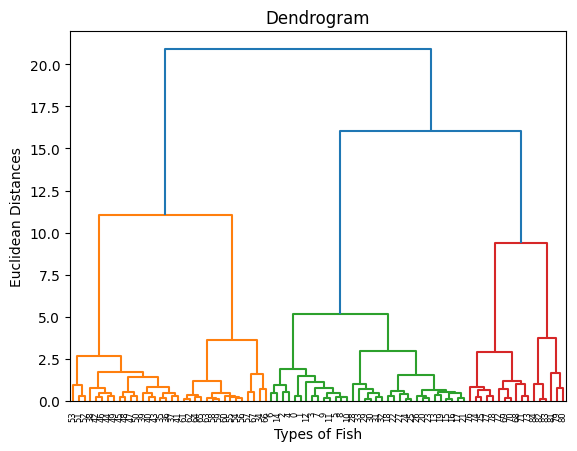

In [ ]:

import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(x,method='ward'))

plt.title('Dendrogram')
plt.xlabel('Types of Fish')
plt.ylabel('Euclidean Distances')
plt.show()

In [ ]:

from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(x)

In [ ]:

y_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2])

In [ ]:
#evaluation

from sklearn.metrics import silhouette_score
s_sc=silhouette_score(x,y_hc)
s_sc


0.5694132019153356